In [2]:
import pandas as pd


dielectric = pd.read_csv("dielectric_doc")
electronic = pd.read_csv("electronic_doc")
magnetic = pd.read_csv("magnetic_doc.csv")
material = pd.read_csv("mat_doc")
oxidation_states=pd.read_csv("oxidation_states_doc")
thermo = pd.read_csv("thermo_doc")

dataframes = [dielectric,electronic,magnetic,material,oxidation_states,thermo]

In [3]:
for i, df in enumerate(dataframes):
    if 'Unnamed: 0' in df.columns:
        dataframes[i] = df.drop(columns='Unnamed: 0')

In [4]:
dielectric = dataframes[0]
electronic = dataframes[1]
magnetic = dataframes[2]
material = dataframes[3]
oxidation_states = dataframes[4]
thermo = dataframes[5]

In [10]:
oxidation_states

,material_id,possible_species,possible_valences,average_oxidation_states
0,mp-1001784,"['S2-', 'Ti3+', 'Li+']","[1.0, 3.0, -2.0, -2.0]","{'Li': 1.0, 'Ti': 3.0, 'S': -2.0}"
1,mp-1001916,"['N3-', 'Hf3+']","[3.0, -3.0]","{'Hf': 3.0, 'N': -3.0}"
2,mp-1008920,"['Ge4-', 'Mn2+']","[2.0, 2.0, -4.0]","{'Mn': 2.0, 'Ge': -4.0}"
3,mp-1012791,"['V3+', 'Na+', 'V4+', 'P5+', 'O2-']","[1.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 5.0, ...","{'Na': 1.0, 'V': 3.3333333333333335, 'P': 5.0,..."
4,mp-1012865,"['Li+', 'Ti3+', 'Ti4+', 'P5+', 'O2-']","[1.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 5.0, ...","{'Li': 1.0, 'Ti': 3.3333333333333335, 'P': 5.0..."
...,...,...,...,...
158430,mp-1377793,"['F-', 'Pd2+', 'Na+']","[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, -1.0,...","{'Na': 1.0, 'Pd': 2.0, 'F': -1.0}"
158431,mp-1379023,"['Cu2+', 'Cr4+', 'F-', 'Ba2+']","[2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, ...","{'Ba': 2.0, 'Cr': 4.0, 'Cu': 2.0, 'F': -1.0}"
158432,mp-1379871,"['O2-', 'O-', 'Fe3+', 'Zn2+']","[2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","{'Zn': 2.0, 'Fe': 3.0, 'O': -1.5555555555555556}"
158433,mp-1388,[],[],{}


In [9]:
material

,material_id,composition,volume,density,density_atomic
0,mp-1095100,U4 Sn2 Ir4,212.160469,15.328048,21.216047
1,mp-1202011,Li4 U6 Se4 O40,941.332114,4.254408,17.432076
2,mp-772938,Li4 Ta8 O22,419.892491,7.226515,12.349779
3,mp-631478,Ir1 Pb1 Br1,80.396737,9.900044,26.798912
4,mp-1194431,Hf18 Fe2 W8,554.895550,14.349848,19.817698
...,...,...,...,...,...
154713,mp-866282,Ca1 Th1 Rh2,84.263415,9.418281,21.065854
154714,mp-31040,Nb2 Cl8,264.771045,2.944121,26.477104
154715,mp-1228406,Al8 Zn6 Cr4 O24,425.176473,4.687714,10.123249
154716,mp-850287,Na6 Ni7 O14,268.744581,4.774936,9.953503


Análisis estadístico del DataFrame 0
Histograma de la columna e_total


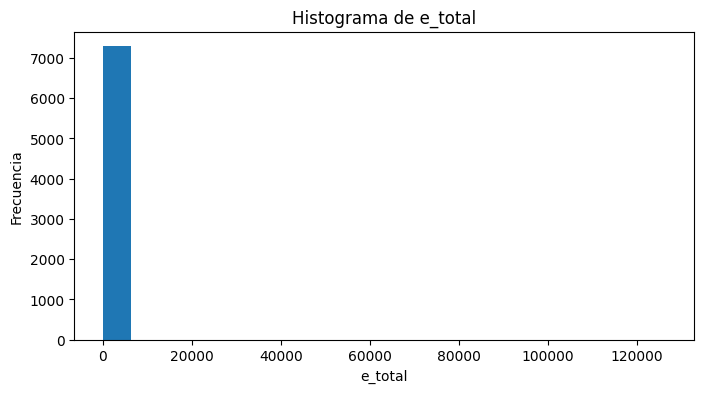

Histograma de la columna e_ionic


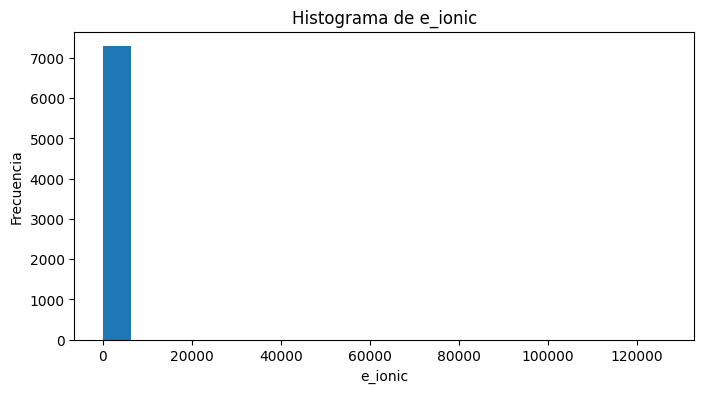

Histograma de la columna e_electronic


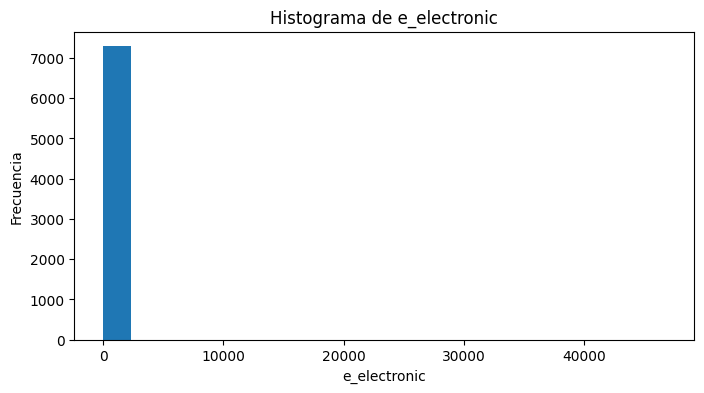

Histograma de la columna n


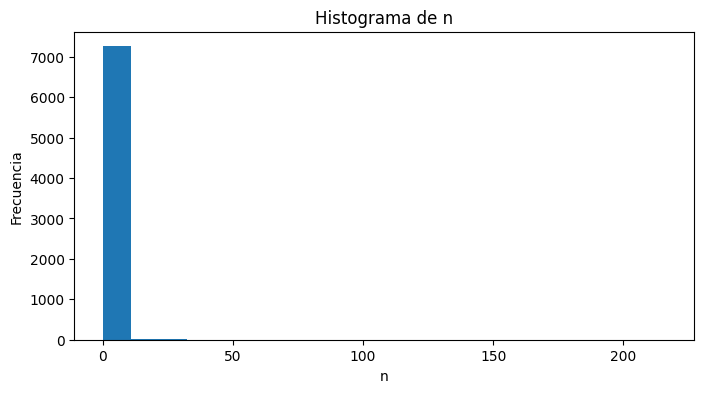

Análisis estadístico del DataFrame 1
Histograma de la columna band_gap


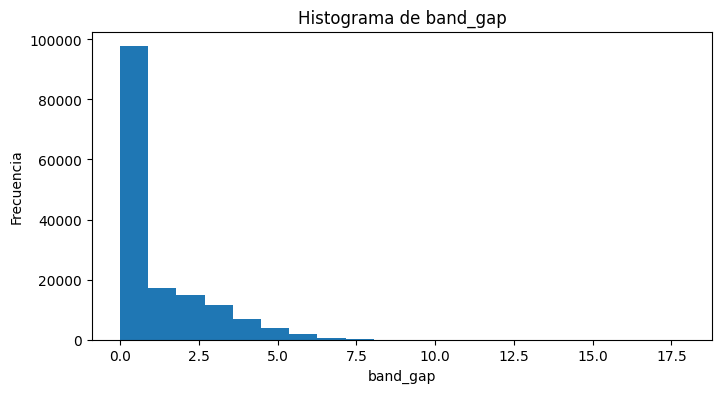

Histograma de la columna efermi


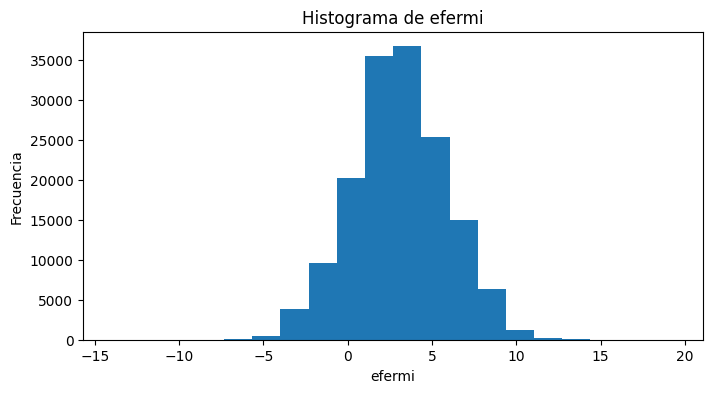

Histograma de la columna is_metal


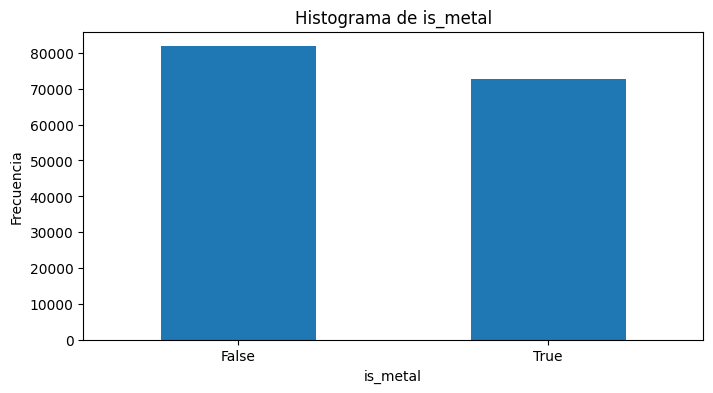

Análisis estadístico del DataFrame 2
Histograma de la columna is_magnetic


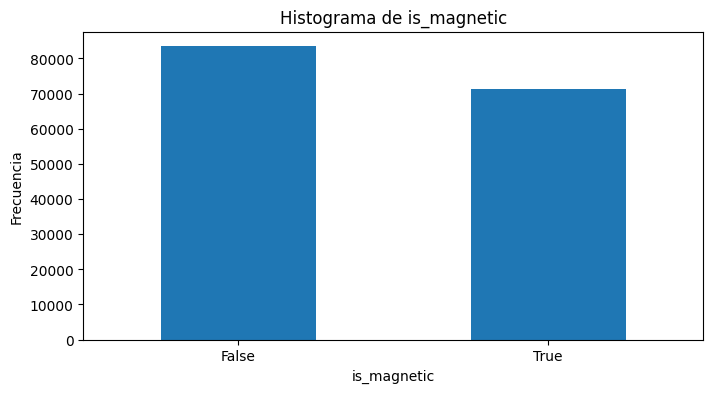

Histograma de la columna exchange_symmetry


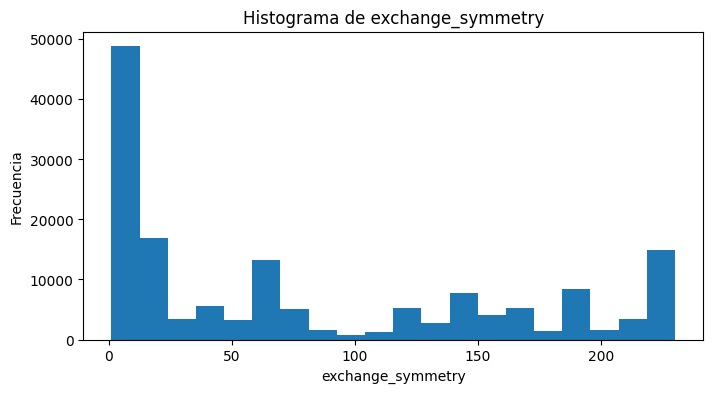

Histograma de la columna num_magnetic_sites


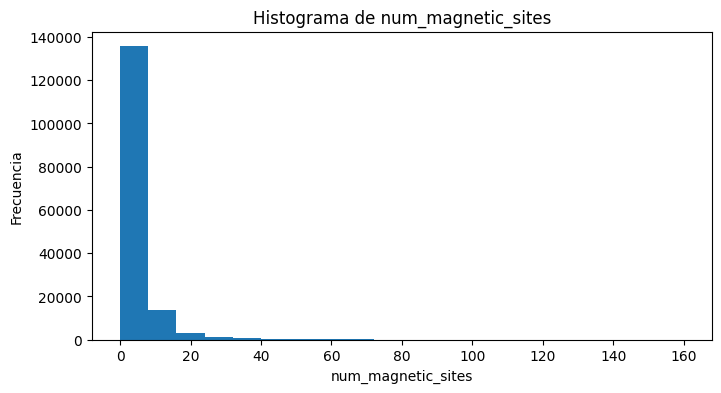

Análisis estadístico del DataFrame 3
Histograma de la columna volume


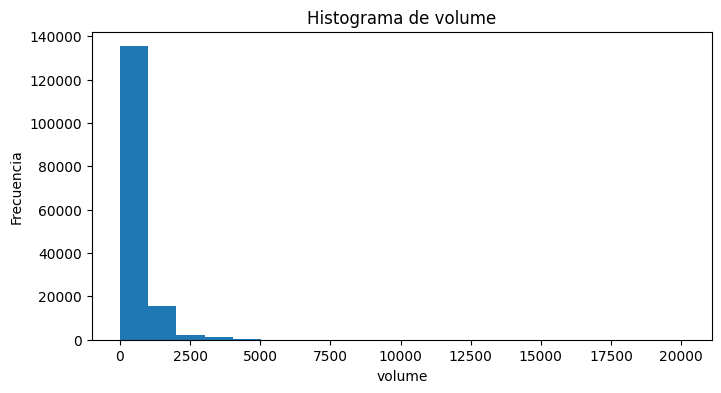

Histograma de la columna density


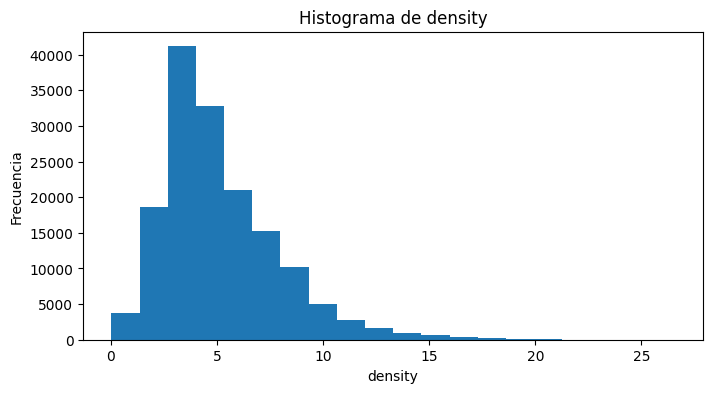

Histograma de la columna density_atomic


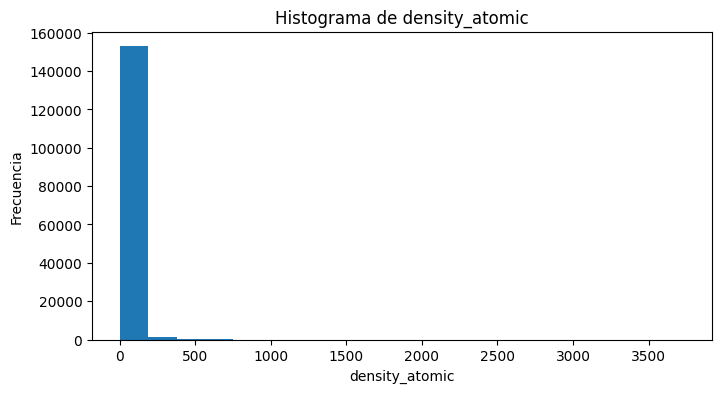

Análisis estadístico del DataFrame 4
Análisis estadístico del DataFrame 5
Histograma de la columna energy_per_atom


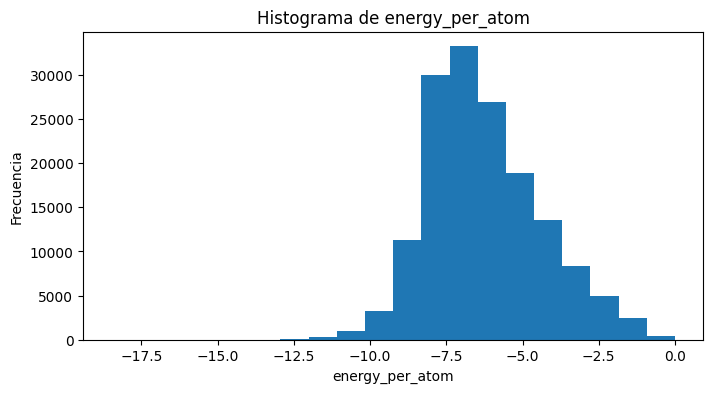

Histograma de la columna formation_energy_per_atom


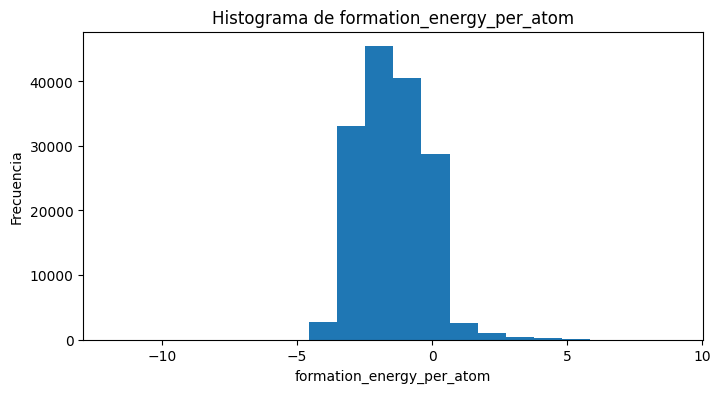

Histograma de la columna equilibrium_reaction_energy_per_atom


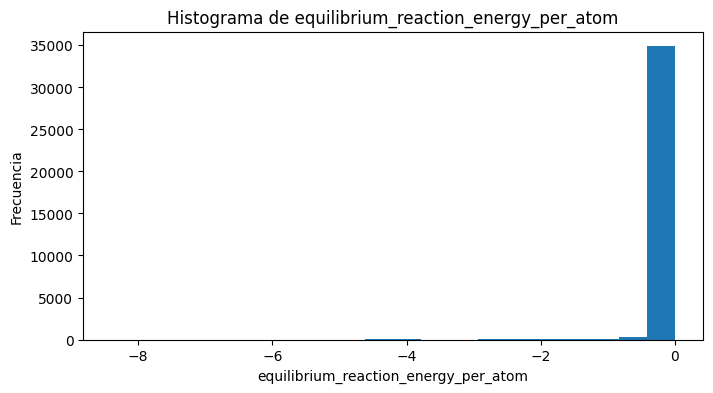

Histograma de la columna decomposition_enthalpy


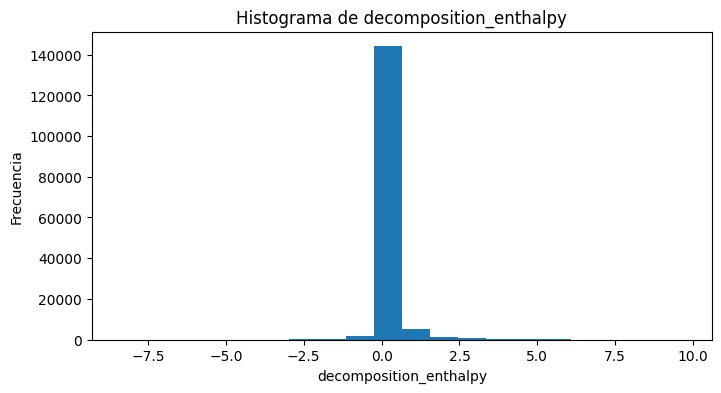

In [13]:
import matplotlib.pyplot as plt

# Supongamos que tienes una lista de DataFrames llamada 'dataframes'
# Cada DataFrame en la lista representa un conjunto de datos

for i, df in enumerate(dataframes):
    print("Análisis estadístico del DataFrame " + str(i))
    for column in df.columns[1:]:
        if (df is oxidation_states) or (df is material and column == 'composition'):
            # Evita por completo el DataFrame oxidation_states y la columna 'composition' de material
            continue
        
        print("Histograma de la columna " + column)
        
        plt.figure(figsize=(8, 4))
        
        # Verificar si la columna contiene valores booleanos
        if df[column].dtype == bool:
            data_clean = df[column].value_counts()
            data_clean.plot(kind='bar', rot=0)
        else:
            data_clean = df[column].dropna()  # Eliminar filas con NaN en la columna
            
            plt.hist(data_clean, bins=20)
        
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        
        # Opcional: Guardar los gráficos en archivos
        # plt.savefig(f'histogram_{i}_{column}.png')
        
        plt.show()

